# Libraries

In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

# Coordinate matrix

In [2]:
# number of nodes
nnos = 101
# number of elements
nel  = nnos - 2

# coordinate matrix pre-allocation
coord = np.zeros((nnos, 3))  
coord[0][0] = 1

# theta value
theta = (np.pi/2)/(nnos-2)

for i in range(0, nnos-1):
    coord[i + 1][0] = i + 2             # Node reference  
    coord[i + 1][1] = np.cos(theta*i)   # X coordinate
    coord[i + 1][2] = np.sin(theta*i)   # Y coordinate

# Plot 

Text(0, 0.5, 'y')

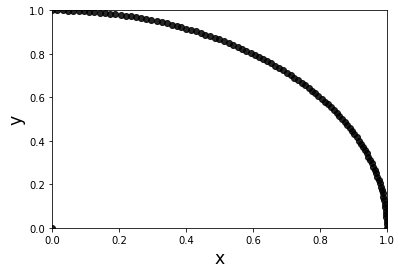

In [3]:
fig = plt.figure()
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(coord[:,1], coord[:,2], marker = 'o', c = 'black', alpha = 0.85)
plt.xlabel('x', fontsize = 'xx-large')
plt.ylabel('y', fontsize = 'xx-large')

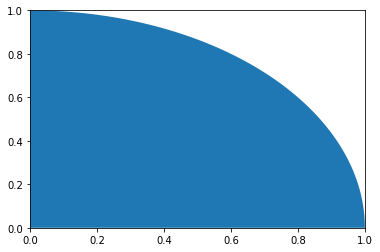

In [4]:
fig, ax = plt.subplots()
plt.xlim([0,1])
plt.ylim([0,1])
ax.fill(coord[:,1], coord[:,2],0)

# Incidence matrix

In [5]:
# incidence matrix pre-allocation
inci = np.zeros((nel, 3))  

for i in range(0,nel):
    # central node
    inci[i][0] = 1
    # first node
    inci[i][1] = i + 2
    # second node
    inci[i][2] = i + 3

# Area

In [6]:
# somatory
A = 0 

# central node coordinates
x1 = coord[int(inci[0,0] - 1), 1]
y1 = coord[int(inci[0,0] - 1), 2]

f = np.zeros(nnos-1)

for i in range(0,nel):
    #     second node coordinates
    x2 = coord[int(inci[0,1] - 1), 1]
    y2 = coord[int(inci[0,1] - 1), 2]
    
    #     third node coordinates
    x3 = coord[int(inci[0,2] - 1), 1]
    y3 = coord[int(inci[0,2] - 1), 2]
    
    a = 0.5*((x2 - x1)*(y3-y1) - (x3 - x1)*(y2 - y1))
    
    f[i] = a
    
    #     area summation
    A = A + a
    
# relative error
error_Area = (np.pi/4 - A)/(np.pi/4)*100
# display('Error = ',error_Area)

print('Error = ', error_Area,'%')

Error =  0.00419577941351902 %


# Centroid

In [7]:
centx = 0
centy = 0

for i in range(0,nel):
    #     second node coordinates
    x2 = coord[int(inci[0,1] - 1), 1]
    y2 = coord[int(inci[0,1] - 1), 2]
    
    #     third node coordinates
    x3 = coord[int(inci[0,2] - 1), 1]
    y3 = coord[int(inci[0,2] - 1), 2]   
    
    centx = centx + f[i]*((x1+x2+x3)/3)
    centy = centy + f[i]*((y1+y2+y3)/3)
    
# centroid X
X = centx/A

# centroid Y
Y = centy/A

# exact centroid 
exact_cent = 4/(np.pi*3)

# error X
error_x = (exact_cent - X)/exact_cent*100
# error Y
error_y = (exact_cent - Y)/exact_cent*100

print('Error centroid X = ', error_x,'%')
print('Error centroid Y = ', error_y,'%')

Error centroid X =  -57.06974669011344 %
Error centroid Y =  98.75389011436114 %


# Inertia moment

In [ ]:
Ix = 